In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [5]:
from google.colab import files
import io

data=files.upload()

Saving house-prices.csv to house-prices.csv


In [6]:
df=pd.read_csv(io.StringIO(data['house-prices.csv'].decode('utf-8')))
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [7]:
df.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


<ipython-input-8-c795ff319ab3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


<Axes: >

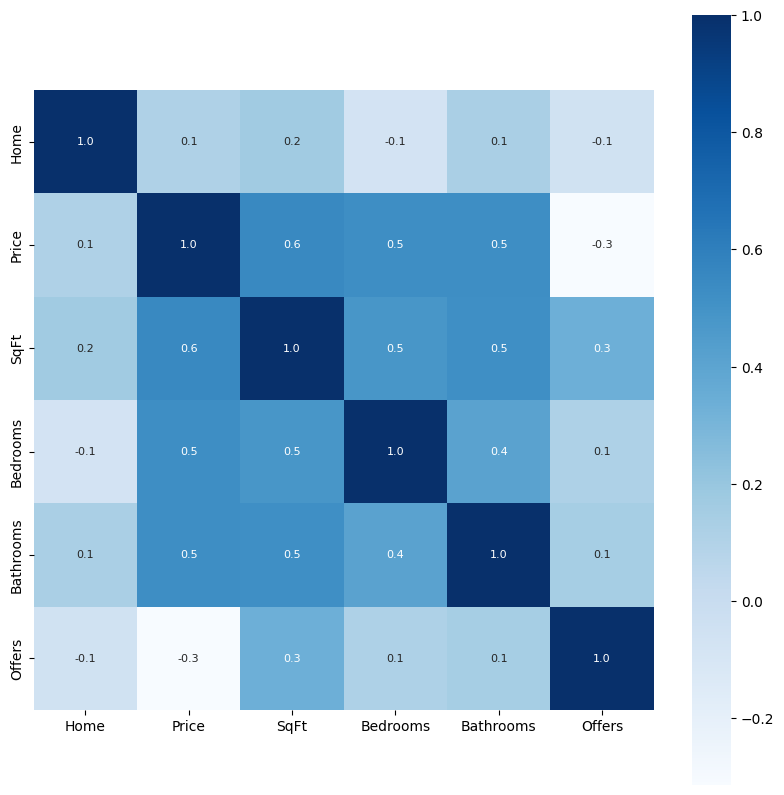

In [8]:
correlation=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [9]:
distinct_neighborhoods = df['Neighborhood'].unique()
print(distinct_neighborhoods)

['East' 'North' 'West']


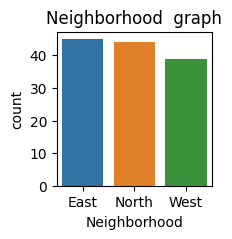

In [10]:
# plt.figure(figize=(6,6))
plt.figure(figsize=(2,2))
sns.countplot(x="Neighborhood",data=df)
plt.title("Neighborhood  graph")
plt.show()

In [11]:
df.replace({'Neighborhood': {'East': 0, 'North': 1, 'West': 2}},inplace=True)
#East=0 north=1  west=2
print(df['Neighborhood'].unique())

[0 1 2]


In [12]:
df=df.sample(frac=1)
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
20,21,116200,1790,3,2,3,No,0
11,12,123000,1870,2,2,2,Yes,0
4,5,119800,2130,3,3,3,No,0
42,43,105600,1990,2,2,3,No,0
65,66,111100,1450,2,2,1,Yes,1


In [13]:
df.replace({'Brick': {'Yes': 1, 'No': 0}},inplace=True)
print(df['Brick'].unique())
df.head()

[0 1]


,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
20,21,116200,1790,3,2,3,0,0
11,12,123000,1870,2,2,2,1,0
4,5,119800,2130,3,3,3,0,0
42,43,105600,1990,2,2,3,0,0
65,66,111100,1450,2,2,1,1,1


In [14]:
x=df.drop(columns=['Price','Home'],axis=1)
y=df['Price']


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [16]:
x_train.shape

(102, 6)

In [17]:
reg=LinearRegression()

In [18]:
reg.fit(x_train,y_train)

LinearRegression()

In [19]:
training_data_prediction=reg.predict(x_train)

In [20]:
r2_train = metrics.r2_score(y_train, training_data_prediction)

In [21]:
r2_train    #Accuracy in training data

0.8431727981767212

In [22]:
test_data_prediction=reg.predict(x_test)

In [23]:
r2_test=metrics.r2_score(y_test,test_data_prediction)

In [24]:
r2_test    #Accuracy in testing datas

0.8532118619289752

In [25]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, test_data_prediction)
print(mae)

8198.73192659572


I gave sample input the 98th value in dataset and 41st value

In [31]:
# sample_input=(2060,3,2,1,0,2)  ##98th value
#sample_input=(1840,4,3,2,0,2)    ##41st value the price is
sample_input=(2250,3,3,3,1,0)  #33rd value

In [32]:
input_data_numpy_array=np.asarray(sample_input)

In [33]:
input_data_reshaped=input_data_numpy_array.reshape(1,-1)

In [34]:
prediction=reg.predict(input_data_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
# prediction=prediction-5946.750555750012
print("The cost of House is ",prediction)

The cost of House is  [147922.57409581]
